In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger dataset nettoyé
df = pd.read_csv("../data/sales_clean.csv")

In [7]:
total_sales = df['Ventes'].sum()
print(f"Chiffre d'affaires total: {total_sales:.10f}")

Chiffre d'affaires total: 2421967.1349999998


In [19]:
sales_by_product = df.groupby('Produits')['Ventes'].sum().sort_values(ascending=False)
print(sales_by_product)
sales_by_category = df.groupby('Catégories')['Ventes'].sum().sort_values(ascending=False)
print(sales_by_category)

Produits
Lego                240502.325
Ordinateur          122653.175
Casque              122423.545
Veste               120761.040
Voiture rc          120627.430
Montre connectée    119701.150
Tapis de yoga       119329.405
Coussin             118951.610
Puzzle              117822.830
Chaise              116681.690
Robe                116349.650
Ballon              115561.825
Table               111720.545
Raquette            110189.140
Lampe               109280.895
Poupée              109018.320
Jean                108468.675
Smartphone          107704.740
T-shirt             107257.965
Haltères            106961.180
Name: Ventes, dtype: float64
Catégories
Sport           608792.945
Electronique    458998.685
Jouets          455731.575
Maison          454444.340
Vêtements       443999.590
Name: Ventes, dtype: float64


#### Analyse
1. La catégorie "Jouets" : Portée par un "Produit Star"
C'est l'exemple le plus frappant de dépendance.
CA Catégorie : 455 731 €
Produit Star (Lego) : 240 502 €
Analyse : Le produit Lego représente à lui seul 53 % du chiffre d'affaires de sa catégorie (en supposant que Poupée, Puzzle et Voiture rc complètent le reste).
Risque : S'il y a un problème d'approvisionnement sur les Lego, c'est la moitié de la santé de ce département qui s'effondre.
2. La catégorie "Sport" : Un ensemble homogène
Bien qu'elle soit la première catégorie en volume (608 792 €), elle est beaucoup plus équilibrée.
Composants : Tapis de yoga (119k), Ballon (115k), Raquette (110k), Haltères (106k)...
Analyse : Aucun produit ne domine outrageusement les autres. Chaque référence contribue de manière équivalente (environ 18-20 % chacune).
Avantage : C'est une catégorie robuste. La perte d'un produit ne met pas en péril l'ensemble de la catégorie.
3. La catégorie "Électronique" : Une tête de liste marquée
CA Catégorie : 458 998 €
Leaders : Ordinateur (122k) et Casque (122k) sont au coude-à-coude.
Analyse : Ces deux produits portent plus de 53 % de la catégorie, tandis que le Smartphone (107k) et la Montre connectée (119k) complètent bien l'offre. C'est un mix sain, tiré par un duo de tête.
4. La catégorie "Vêtements" : Très homogène
Composants : Veste (120k), Robe (116k), Jean (108k), T-shirt (107k).
Analyse : L'écart entre le meilleur produit (Veste) et le moins bon (T-shirt) est faible (environ 13k€). Les ventes sont très bien réparties.
5. La catégorie "Maison" : Un ensemble très équilibré
CA Total de la catégorie : 454 444 €
Produits identifiés : Coussin (118k), Chaise (116k), Table (111k), Lampe (109k).
Répartition : Comme pour la catégorie "Vêtements", les revenus sont extrêmement bien répartis. Le produit leader (Coussin) ne représente que 26 % du chiffre d'affaires total de la catégorie.
Stabilité : L'écart entre le produit le plus vendu (Coussin) et le moins vendu (Lampe) n'est que de 9 %. Cela indique une gamme cohérente où chaque meuble ou accessoire trouve son public de manière équivalente.

#### Synthèse et Recommandations Business
Catégorie:Jouets, Diagnostic:Déséquilibrée, Recommandation:Sécuriser le stock de Lego (produit critique) et essayer de diversifier avec d'autres marques.
Catégorie:Sport, Diagnostic:Homogène, Recommandation:Continuer la stratégie actuelle, c'est le socle le plus stable.
Catégorie:Électronique, Diagnostic:Mixte, Recommandation:Surveiller le duo Ordinateur/Casque qui génère la majorité de la croissance.
Catégorie:Vêtements, Diagnostic:Homogène, Recommandation:Pas de dépendance, c'est un catalogue équilibré facile à gérer.
Catégorie:Maison, Diagnostic:Homogène, Recommandation:Opportunité de Vente Croisée (Cross-selling) puisque tous les produits se vendent de manière presque identique. Par exemple, créer des packs "Lampe + Table" ou "Chaise + Coussin" pourrait augmenter le panier moyen global de cette catégorie sans trop d'effort marketing.
Conclusion : Le plus grand défi en 2025 est la dépendance au produit Lego. C'est la "vache à lait", mais c'est aussi le talon d'Achille.

In [17]:
# Convertir les sommes en DataFrame pour faciliter les calculs
df_pareto_product = sales_by_product.reset_index()
df_pareto_category = sales_by_category.reset_index()

# Calculer le pourcentage de CA de chaque produit
df_pareto_product['Pourcentage_CA'] = (df_pareto_product['Ventes'] / total_sales) * 100
df_pareto_category['Pourcentage_CA'] = (df_pareto_category['Ventes'] / total_sales) * 100

# Calculer le pourcentage cumulé du CA
df_pareto_category['CA_Cumule'] = df_pareto_category['Pourcentage_CA'].cumsum()
df_pareto_product['CA_Cumule'] = df_pareto_product['Pourcentage_CA'].cumsum()
#print(df_pareto_product)
#print(df_pareto_category)

# Calculer le pourcentage cumulé du nombre de produits et de catégories
df_pareto_product['Pourcentage_Produits_Cumule'] = (df_pareto_product.index + 1) / len(df_pareto_product) * 100
df_pareto_category['Pourcentage_Catégories_Cumule'] = (df_pareto_category.index + 1) / len(df_pareto_category) * 100

# Trouver la première ligne où le CA cumulé dépasse 80%
# idxmax() trouve l'index de la première valeur True
index_80_percent_product = (df_pareto_product['CA_Cumule'] >= 80).idxmax()
index_80_percent_category = (df_pareto_category['CA_Cumule'] >= 80).idxmax()

# Extraire le pourcentage de produits à ce niveau
pourcentage_produits_pour_80_ca = df_pareto_product.loc[index_80_percent_product, 'Pourcentage_Produits_Cumule']
pourcentage_categories_pour_80_ca = df_pareto_category.loc[index_80_percent_category, 'Pourcentage_Catégories_Cumule']

print(f"80% du chiffre d'affaires est réalisé par {pourcentage_produits_pour_80_ca:.2f}% des produits.")
print(f"80% du chiffre d'affaires est réalisé par {pourcentage_categories_pour_80_ca:.2f}% des catégories.")

80% du chiffre d'affaires est réalisé par 80.00% des produits.
80% du chiffre d'affaires est réalisé par 80.00% des catégories.


Analyse de Concentration (Pareto) :  Les ventes sont très dispersées sur l'ensemble du catalogue. Le business est plus diversifié et moins risqué face à la perte d'un produit phare ou l'abandon d'une catégorie.

In [10]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Mois'] = df['Dates'].dt.to_period('M') 
sales_by_month = df.groupby('Mois')['Ventes'].sum().sort_values(ascending=False)
print(sales_by_month)

Mois
2023-12    104250.516849
2024-02    101494.817081
2024-01     98166.071965
2024-07     97912.465867
2023-09     97863.433179
2023-03     97582.569769
2024-06     95242.119277
2023-05     94623.144162
2024-10     93203.551474
2023-02     93059.021965
2023-07     93005.903670
2024-09     92717.735867
2024-08     90836.107572
2024-05     89512.359277
2024-03     88156.290260
2024-04     87932.101474
2023-10     87705.553670
2023-04     86744.349769
2023-01     86016.629769
2023-08     84559.619769
2023-06     83906.666358
2024-11     83819.749769
2023-11     81840.647572
2024-12     75080.943179
Freq: M, Name: Ventes, dtype: float64


#### Analyse
1. Le Pic de Fin d'Année (Saisonnalité de Noël)
Le mois de décembre 2023 est le record absolu avec 104 250. C’est un indicateur classique de forte activité liée aux fêtes de fin d’année. Cependant, il y a une anomalie en 2024 : le CA de décembre chute à 75 080, ce qui est le point le plus bas de l'historique.
Analyse : Soit les données de décembre 2024 sont incomplètes (si nous sommes en tout début de mois), soit ce business a subi une perte de vitesse brutale en un an.
2. La Dynamique du Début d'Année
Les mois de janvier et février affichent d'excellentes performances en 2024 (respectivement 98 166 et 101 494), dépassant largement les résultats de 2023.
Analyse : L'entreprise semble profiter d'un fort "effet rebond" après les fêtes, possiblement lié aux soldes d'hiver ou à des renouvellements de contrats annuels.
3. Le Creux de Printemps et Stabilité Estivale
On observe une baisse récurrente vers avril/mai (autour de 86k-89k) avant une remontée en juin/juillet.
Analyse : Il existe une saisonnalité estivale positive, avec un pic notable en juillet 2024 (97 912). Les produits sont probablement sollicités durant la période estivale.
4. Synthèse 2023 vs 2024 (Croissance)
Si l'on compare les mêmes mois d'une année sur l'autre :
Janvier : +14% de croissance (86k en 2023 vs 98k en 2024).
Février : +9% de croissance (93k en 2023 vs 101k en 2024).
Novembre : Stable mais faible (autour de 82k-83k).
#### Recommandations Business :
1. Anticiper le Pic de Q1 (Janvier-Mars) : Contrairement à beaucoup de commerces qui s'essoufflent après Noël, ce business reste très fort en début d'année. Prévoir des stocks et du personnel en conséquence dès janvier.
2. Investiguer la chute de Décembre 2024 : Avec seulement 75k contre 104k l'année précédente, il est crucial de comprendre pourquoi cette période n'a pas performé (problème d'approvisionnement, concurrence, ou données manquantes ?).
3. Relancer Novembre : Ce mois est systématiquement dans les résultats les plus faibles. Une campagne marketing agressive (type Black Friday) pourrait aider à lisser le CA avant décembre.

In [11]:
top_products = df.groupby('Produits')['Ventes'].sum().nlargest(5)
print(top_products)

top_categories = df.groupby('Catégories')['Ventes'].sum().nlargest(5)
print(top_categories)

Produits
Lego          117833.431965
Ordinateur    115979.024162
Casque        115712.855867
Veste         115408.360260
Voiture RC    115220.866849
Name: Ventes, dtype: float64
Catégories
Sport           459133.690548
Electronique    437683.130548
Jouets          437408.536646
Maison          427504.719074
Vêtements       423502.292745
Name: Ventes, dtype: float64


Ces produits et catégories représentent le top 5 du chiffre d'affaires total.

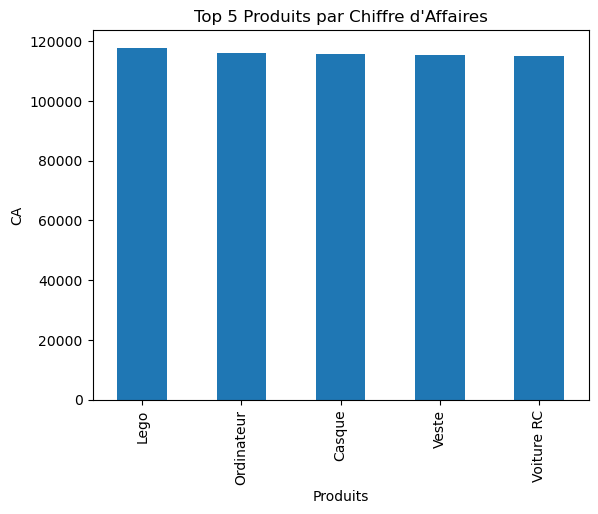

In [12]:
top_products.plot(kind='bar', title="Top 5 Produits par Chiffre d'Affaires")
plt.ylabel('CA')
plt.show()